In [1]:
from typing import List, Callable, Tuple
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def hillclimbing(
    objective: Callable,
    bounds: Tuple[float, float],
    iterations: int,
    step_size: float
) -> Tuple[np.ndarray, np.ndarray, List]:
    # initial point
    solution = np.random.uniform(*bounds)
    # value of the initial point
    solution_eval = objective(solution)
    # variable to keep track of solutions
    sols = []
    # running the hill climb algorithm
    for i in range(iterations):
        # getting a random candidate point
        candidate = solution + np.random.randn() * step_size
        # getting the value of the candidate using the objective function
        candidate_eval = objective(candidate)

        # if candidate is better
        if candidate_eval <= solution_eval:
            # setting solution as candidate
            solution, solution_eval = candidate, candidate_eval
            # appending solution value to sols
            sols.append(solution)

            # report progress
            print(
                f'iteration %{len(str(iterations))}d: f(%.5f) = %.5f' 
                % (i, solution, solution_eval)
            )

    return solution, solution_eval, sols

def plot_results(objective, bounds, sols, figsize=(15, 10)):
    x = np.linspace(*bounds, 100)
    y = objective(x)

    plt.figure(figsize=figsize)
    plt.plot(x, y, label="actual")
    plt.plot(sols, [objective(x) for x in sols], 'o',label="hill climbing")
    plt.legend()
    plt.grid()

    plt.show()

In [3]:
objective = lambda x: np.cos(3*np.pi*x)/x
bounds = [0, 3]
iterations = 1000
step_size = 0.1

best, value, sols = hillclimbing(objective, bounds, iterations, step_size)

iteration    1: f(1.88143) = 0.23278
iteration    3: f(1.73633) = -0.45620
iteration    4: f(1.69579) = -0.56761
iteration    5: f(1.63584) = -0.58569
iteration   22: f(1.63628) = -0.58625
iteration   24: f(1.67455) = -0.59553
iteration   28: f(1.65012) = -0.59866
iteration   34: f(1.65590) = -0.60079
iteration  125: f(1.66224) = -0.60107
iteration  224: f(1.65790) = -0.60112
iteration  236: f(1.65820) = -0.60115
iteration  239: f(1.65947) = -0.60122
iteration  957: f(1.65978) = -0.60122


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


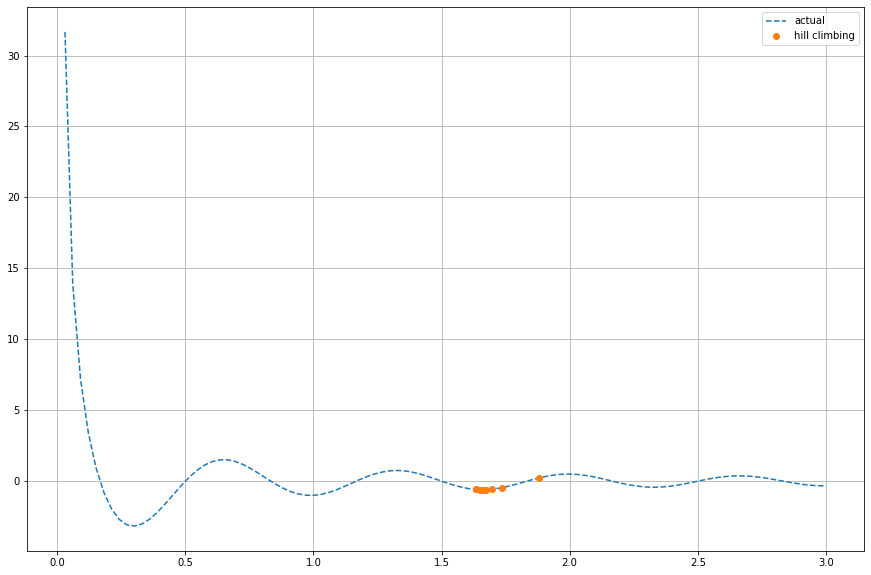

In [4]:
plot_results(objective, bounds, sols)